In [1]:
import pandas as pd
import numpy as np
import warnings as wr
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

wr.filterwarnings("ignore")

In [2]:
loc_lbl = r"D:\Documentos\Facu\Organizacion de Datos\TP2\Labels"
loc_ftr = r"D:\Documentos\Facu\Organizacion de Datos\TP2\Features\ftr_auc"

In [3]:
auc_lb = pd.read_csv( loc_lbl + "\\auc_lb.csv", dtype = {"obs_18_20":"bool", "obs_21_23":"bool", "obs_24_26":"bool"} )

In [4]:
auc_lb['ref_hash'] = auc_lb['device_id']

### Filtro de manera que tenga los datos necesarios

In [5]:
rh_18_20 = pd.read_csv( "D:\Documentos\Facu\Organizacion de Datos\TP2\Training Sets\\auc_18_20.csv" ).rename( columns = {"device_id":"ref_hash"} ); rh_18_20 = rh_18_20["ref_hash"].drop_duplicates().tolist()
rh_21_23 = pd.read_csv( "D:\Documentos\Facu\Organizacion de Datos\TP2\Training Sets\\auc_21_23.csv" ).rename( columns = {"device_id":"ref_hash"} ); rh_21_23 = rh_21_23["ref_hash"].drop_duplicates().tolist()

In [6]:
dt_18_20 = auc_lb.loc[ auc_lb["ref_hash"].isin( rh_18_20 ), ["ref_hash"] ] #Datos del (18-20)
st_21_23 = auc_lb.loc[ auc_lb["ref_hash"].isin( rh_18_20 ), ["21_23_st"] ] #SC del (21-23)

dt_21_23 = auc_lb.loc[ auc_lb["ref_hash"].isin( rh_21_23 ), ["ref_hash"] ] #Datos del (21-23)
st_24_26 = auc_lb.loc[ auc_lb["ref_hash"].isin( rh_21_23 ), ["24_26_st"] ] #SC del (24-26)

# <span style="color:orange">  Preparo los datos para predecir </span>
Con los datos 21-23 predecimos "24-26_sc"

In [7]:
Z = dt_21_23

### Agregamos los features 

In [8]:
ftr_01_Z = pd.read_csv( loc_ftr + "\\hora_auc_21_23.csv" )  ; Z = Z.merge( ftr_01_Z, how = "inner", on = "ref_hash" )
ftr_02_Z = pd.read_csv( loc_ftr + "\\cant_clk_21_23.csv" )  ; Z = Z.merge( ftr_02_Z, how = "inner", on = "ref_hash" )
ftr_03_Z = pd.read_csv( loc_ftr + "\\cant_ins_21_23.csv" )  ; Z = Z.merge( ftr_03_Z, how = "inner", on = "ref_hash" )
ftr_04_Z = pd.read_csv( loc_ftr + "\\cant_auc_21_23.csv" )  ; Z = Z.merge( ftr_04_Z, how = "inner", on = "ref_hash" )
ftr_05_Z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv" )  ; Z = Z.merge( ftr_05_Z, how = "inner", on = "ref_hash" )
ftr_07_Z = pd.read_csv( loc_ftr + "\\sdia_auc_21_23.csv" )  ; Z = Z.merge( ftr_07_Z, how = "inner", on = "ref_hash" )
ftr_10_Z = pd.read_csv( loc_ftr + "\\main_ahr_21_23.csv" )  ; Z = Z.merge( ftr_10_Z, how = "inner", on = "ref_hash" )
ftr_11_Z = pd.read_csv( loc_ftr + "\\auc_after_21_23.csv" ) ; Z = Z.merge( ftr_11_Z, how = "inner", on = "ref_hash" )
ftr_12_Z = pd.read_csv( loc_ftr + "\\auc_midday_21_23.csv" ); Z = Z.merge( ftr_12_Z, how = "inner", on = "ref_hash" )
ftr_13_Z = pd.read_csv( loc_ftr + "\\auc_morn_21_23.csv" )  ; Z = Z.merge( ftr_13_Z, how = "inner", on = "ref_hash" )
ftr_14_Z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv" )  ; Z = Z.merge( ftr_14_Z, how = "inner", on = "ref_hash" )
ftr_15_Z = pd.read_csv( loc_ftr + "\\cins_atr_21_23.csv" )  ; Z = Z.merge( ftr_15_Z, how = "inner", on = "ref_hash" )
ftr_16_Z = pd.read_csv( loc_ftr + "\\cins_imp_21_23.csv" )  ; Z = Z.merge( ftr_16_Z, how = "inner", on = "ref_hash" )
ftr_17_Z = pd.read_csv( loc_ftr + "\\clk_after_21_23.csv" ) ; Z = Z.merge( ftr_17_Z, how = "inner", on = "ref_hash" )
ftr_18_Z = pd.read_csv( loc_ftr + "\\clk_midday_21_23.csv" ); Z = Z.merge( ftr_18_Z, how = "inner", on = "ref_hash" )
ftr_19_Z = pd.read_csv( loc_ftr + "\\clk_morn_21_23.csv" )  ; Z = Z.merge( ftr_19_Z, how = "inner", on = "ref_hash" )
ftr_20_Z = pd.read_csv( loc_ftr + "\\clk_night_21_23.csv" ) ; Z = Z.merge( ftr_20_Z, how = "inner", on = "ref_hash" )
ftr_21_Z = pd.read_csv( loc_ftr + "\\evt_after_21_23.csv" ) ; Z = Z.merge( ftr_21_Z, how = "inner", on = "ref_hash" )
ftr_22_Z = pd.read_csv( loc_ftr + "\\evt_midday_21_23.csv" ); Z = Z.merge( ftr_22_Z, how = "inner", on = "ref_hash" )
ftr_23_Z = pd.read_csv( loc_ftr + "\\evt_morn_21_23.csv" )  ; Z = Z.merge( ftr_23_Z, how = "inner", on = "ref_hash" )
ftr_24_Z = pd.read_csv( loc_ftr + "\\evt_night_21_23.csv" ) ; Z = Z.merge( ftr_24_Z, how = "inner", on = "ref_hash" )
ftr_25_Z = pd.read_csv( loc_ftr + "\\frst_auc_21_23.csv" )  ; Z = Z.merge( ftr_25_Z, how = "inner", on = "ref_hash" )
ftr_26_Z = pd.read_csv( loc_ftr + "\\frst_clk_21_23.csv" )  ; Z = Z.merge( ftr_26_Z, how = "inner", on = "ref_hash" )
ftr_27_Z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv" )  ; Z = Z.merge( ftr_27_Z, how = "inner", on = "ref_hash" )
ftr_28_Z = pd.read_csv( loc_ftr + "\\hora_auc_21_23.csv" )  ; Z = Z.merge( ftr_28_Z, how = "inner", on = "ref_hash" )
ftr_29_Z = pd.read_csv( loc_ftr + "\\hr_f_evt_21_23.csv" )  ; Z = Z.merge( ftr_29_Z, how = "inner", on = "ref_hash" )
ftr_30_Z = pd.read_csv( loc_ftr + "\\ins_after_21_23.csv" ) ; Z = Z.merge( ftr_30_Z, how = "inner", on = "ref_hash" )
ftr_31_Z = pd.read_csv( loc_ftr + "\\ins_midday_21_23.csv" ); Z = Z.merge( ftr_31_Z, how = "inner", on = "ref_hash" )
ftr_32_Z = pd.read_csv( loc_ftr + "\\ins_morn_21_23.csv" )  ; Z = Z.merge( ftr_32_Z, how = "inner", on = "ref_hash" )
ftr_33_Z = pd.read_csv( loc_ftr + "\\ins_night_21_23.csv" ) ; Z = Z.merge( ftr_33_Z, how = "inner", on = "ref_hash" )
ftr_34_Z = pd.read_csv( loc_ftr + "\\last_auc_21_23.csv" )  ; Z = Z.merge( ftr_34_Z, how = "inner", on = "ref_hash" )
ftr_35_Z = pd.read_csv( loc_ftr + "\\last_evt_21_23.csv" )  ; Z = Z.merge( ftr_35_Z, how = "inner", on = "ref_hash" )
ftr_36_Z = pd.read_csv( loc_ftr + "\\last_ins_21_23.csv" )  ; Z = Z.merge( ftr_36_Z, how = "inner", on = "ref_hash" )
ftr_37_Z = pd.read_csv( loc_ftr + "\\main_ehr_21_23.csv" )  ; Z = Z.merge( ftr_37_Z, how = "inner", on = "ref_hash" )
ftr_38_Z = pd.read_csv( loc_ftr + "\\mt_1_auc_21_23.csv" )  ; Z = Z.merge( ftr_38_Z, how = "inner", on = "ref_hash" )
ftr_39_Z = pd.read_csv( loc_ftr + "\\wifi_evt_21_23.csv" )  ; Z = Z.merge( ftr_39_Z, how = "inner", on = "ref_hash" )

# <span style="color:orange">  Preparo los datos para entrenar </span>

Con los datos 18-20 + "21-23_sc" entrenamos

In [9]:
Y = st_21_23
X = dt_18_20

### Agregamos los features

In [10]:
ftr_01_X = pd.read_csv( loc_ftr + "\\hora_auc_18_20.csv" )  ; X = X.merge( ftr_01_X, how = "inner", on = "ref_hash" )
ftr_02_X = pd.read_csv( loc_ftr + "\\cant_clk_18_20.csv" )  ; X = X.merge( ftr_02_X, how = "inner", on = "ref_hash" )
ftr_03_X = pd.read_csv( loc_ftr + "\\cant_ins_18_20.csv" )  ; X = X.merge( ftr_03_X, how = "inner", on = "ref_hash" )
ftr_04_X = pd.read_csv( loc_ftr + "\\cant_auc_18_20.csv" )  ; X = X.merge( ftr_04_X, how = "inner", on = "ref_hash" )
ftr_05_X = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv" )  ; X = X.merge( ftr_05_X, how = "inner", on = "ref_hash" )
ftr_07_X = pd.read_csv( loc_ftr + "\\sdia_auc_18_20.csv" )  ; X = X.merge( ftr_07_X, how = "inner", on = "ref_hash" )
ftr_10_X = pd.read_csv( loc_ftr + "\\main_ahr_18_20.csv" )  ; X = X.merge( ftr_10_X, how = "inner", on = "ref_hash" )
ftr_11_X = pd.read_csv( loc_ftr + "\\auc_after_18_20.csv" ) ; X = X.merge( ftr_11_X, how = "inner", on = "ref_hash" )
ftr_12_X = pd.read_csv( loc_ftr + "\\auc_midday_18_20.csv" ); X = X.merge( ftr_12_X, how = "inner", on = "ref_hash" )
ftr_13_X = pd.read_csv( loc_ftr + "\\auc_morn_18_20.csv" )  ; X = X.merge( ftr_13_X, how = "inner", on = "ref_hash" )
ftr_14_X = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv" )  ; X = X.merge( ftr_14_X, how = "inner", on = "ref_hash" )
ftr_15_X = pd.read_csv( loc_ftr + "\\cins_atr_18_20.csv" )  ; X = X.merge( ftr_15_X, how = "inner", on = "ref_hash" )
ftr_16_X = pd.read_csv( loc_ftr + "\\cins_imp_18_20.csv" )  ; X = X.merge( ftr_16_X, how = "inner", on = "ref_hash" )
ftr_17_X = pd.read_csv( loc_ftr + "\\clk_after_18_20.csv" ) ; X = X.merge( ftr_17_X, how = "inner", on = "ref_hash" )
ftr_18_X = pd.read_csv( loc_ftr + "\\clk_midday_18_20.csv" ); X = X.merge( ftr_18_X, how = "inner", on = "ref_hash" )
ftr_19_X = pd.read_csv( loc_ftr + "\\clk_morn_18_20.csv" )  ; X = X.merge( ftr_19_X, how = "inner", on = "ref_hash" )
ftr_20_X = pd.read_csv( loc_ftr + "\\clk_night_18_20.csv" ) ; X = X.merge( ftr_20_X, how = "inner", on = "ref_hash" )
ftr_21_X = pd.read_csv( loc_ftr + "\\evt_after_18_20.csv" ) ; X = X.merge( ftr_21_X, how = "inner", on = "ref_hash" )
ftr_22_X = pd.read_csv( loc_ftr + "\\evt_midday_18_20.csv" ); X = X.merge( ftr_22_X, how = "inner", on = "ref_hash" )
ftr_23_X = pd.read_csv( loc_ftr + "\\evt_morn_18_20.csv" )  ; X = X.merge( ftr_23_X, how = "inner", on = "ref_hash" )
ftr_24_X = pd.read_csv( loc_ftr + "\\evt_night_18_20.csv" ) ; X = X.merge( ftr_24_X, how = "inner", on = "ref_hash" )
ftr_25_X = pd.read_csv( loc_ftr + "\\frst_auc_18_20.csv" )  ; X = X.merge( ftr_25_X, how = "inner", on = "ref_hash" )
ftr_26_X = pd.read_csv( loc_ftr + "\\frst_clk_18_20.csv" )  ; X = X.merge( ftr_26_X, how = "inner", on = "ref_hash" )
ftr_27_X = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv" )  ; X = X.merge( ftr_27_X, how = "inner", on = "ref_hash" )
ftr_28_X = pd.read_csv( loc_ftr + "\\hora_auc_18_20.csv" )  ; X = X.merge( ftr_28_X, how = "inner", on = "ref_hash" )
ftr_29_X = pd.read_csv( loc_ftr + "\\hr_f_evt_18_20.csv" )  ; X = X.merge( ftr_29_X, how = "inner", on = "ref_hash" )
ftr_30_X = pd.read_csv( loc_ftr + "\\ins_after_18_20.csv" ) ; X = X.merge( ftr_30_X, how = "inner", on = "ref_hash" )
ftr_31_X = pd.read_csv( loc_ftr + "\\ins_midday_18_20.csv" ); X = X.merge( ftr_31_X, how = "inner", on = "ref_hash" )
ftr_32_X = pd.read_csv( loc_ftr + "\\ins_morn_18_20.csv" )  ; X = X.merge( ftr_32_X, how = "inner", on = "ref_hash" )
ftr_33_X = pd.read_csv( loc_ftr + "\\ins_night_18_20.csv" ) ; X = X.merge( ftr_33_X, how = "inner", on = "ref_hash" )
ftr_34_X = pd.read_csv( loc_ftr + "\\last_auc_18_20.csv" )  ; X = X.merge( ftr_34_X, how = "inner", on = "ref_hash" )
ftr_35_X = pd.read_csv( loc_ftr + "\\last_evt_18_20.csv" )  ; X = X.merge( ftr_35_X, how = "inner", on = "ref_hash" )
ftr_36_X = pd.read_csv( loc_ftr + "\\last_ins_18_20.csv" )  ; X = X.merge( ftr_36_X, how = "inner", on = "ref_hash" )
ftr_37_X = pd.read_csv( loc_ftr + "\\main_ehr_18_20.csv" )  ; X = X.merge( ftr_37_X, how = "inner", on = "ref_hash" )
ftr_38_X = pd.read_csv( loc_ftr + "\\mt_1_auc_18_20.csv" )  ; X = X.merge( ftr_38_X, how = "inner", on = "ref_hash" )
ftr_39_X = pd.read_csv( loc_ftr + "\\wifi_evt_18_20.csv" )  ; X = X.merge( ftr_39_X, how = "inner", on = "ref_hash" )

In [11]:
Z = Z.drop('ref_hash',axis = 1)
X = X.drop('ref_hash',axis = 1)

# Prediccion con <span style="color:green"> *Random Forest*</span> 

In [12]:
estimator = RandomForestRegressor(max_depth=7, random_state=50, n_estimators=150, oob_score=True, criterion='mse')

In [13]:
pmt = estimator.fit( X.fillna(0),Y.fillna(0))

In [14]:
prd = pmt.predict(  Z.fillna(0) )

### Calculamos el RMSE

In [15]:
rmse = np.sqrt( mean_squared_error(st_24_26, prd) )
print("RMSE: %f" % (rmse))

RMSE: 89232.430652


In [ ]:
RMSE: 72762.380589


## Tunning de HyperParameters

In [40]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, make_scorer
#greater_is_better = False -> Transformar score_function en loss_function
mse = make_scorer( mean_squared_error, greater_is_better = False )

In [ ]:
reg = RandomForestRegressor()

tune_prms = {'max_depth': [1,2,3,4],
             'n_estimators': [80,120,200,250],
             'random_state': [0,10,50]
            }

grid = RandomizedSearchCV( estimator = estimator, param_distributions = tune_prms, cv = 10, n_jobs = 1, scoring = mse, n_iter = 20 ) 
grid.fit(X.fillna(0),Y.fillna(0))    

In [ ]:
# Results from Grid Search
print("==========================================================")
print("||            Results from Grid Search                  ||")
print("==========================================================")    
    
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

## Ploteamos el Feature Importance

Feature ranking:
1. feature 31 (0.610192)
2. feature 3 (0.204599)
3. feature 22 (0.150102)
4. feature 9 (0.012492)
5. feature 7 (0.007798)
6. feature 8 (0.004516)
7. feature 33 (0.004092)
8. feature 35 (0.002691)
9. feature 32 (0.000767)
10. feature 4 (0.000536)
11. feature 24 (0.000495)
12. feature 36 (0.000310)
13. feature 26 (0.000228)
14. feature 5 (0.000209)
15. feature 34 (0.000165)
16. feature 6 (0.000158)
17. feature 23 (0.000098)
18. feature 12 (0.000097)
19. feature 25 (0.000097)
20. feature 2 (0.000068)
21. feature 0 (0.000065)
22. feature 19 (0.000035)
23. feature 10 (0.000031)
24. feature 30 (0.000031)
25. feature 18 (0.000023)
26. feature 20 (0.000021)
27. feature 29 (0.000020)
28. feature 21 (0.000019)
29. feature 27 (0.000016)
30. feature 1 (0.000013)
31. feature 28 (0.000011)
32. feature 15 (0.000004)
33. feature 17 (0.000002)
34. feature 14 (0.000000)
35. feature 13 (0.000000)
36. feature 16 (0.000000)
37. feature 11 (0.000000)


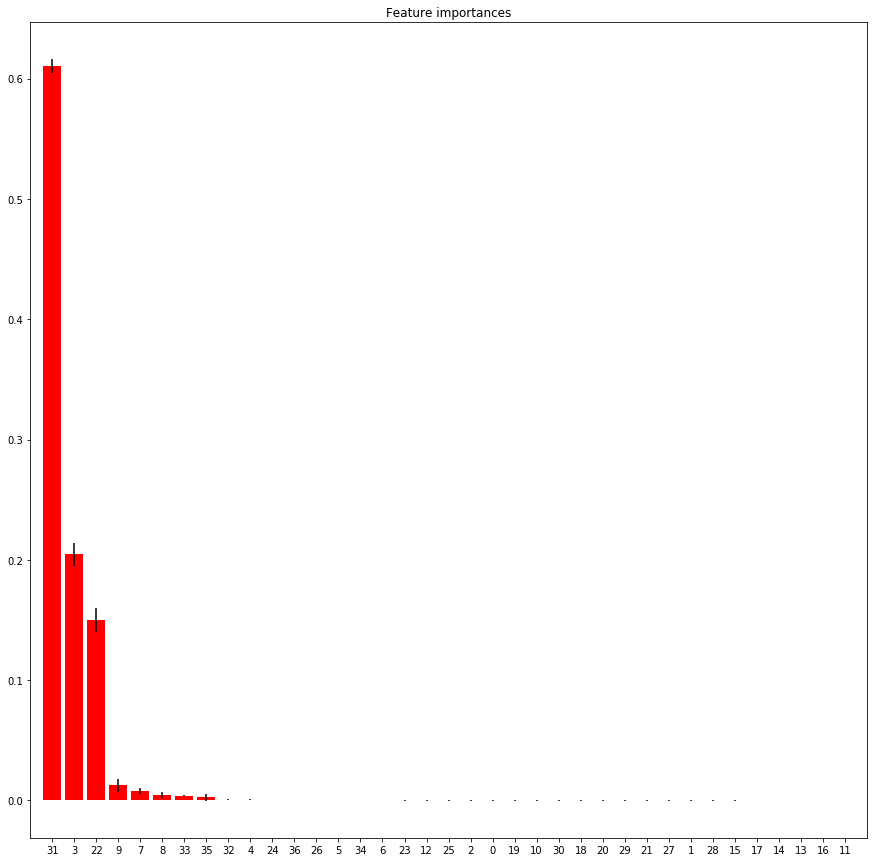

In [17]:
import matplotlib.pyplot as plt
forest = pmt

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,15))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 0 (0.916983)
2. feature 1 (0.052663)
3. feature 2 (0.030355)


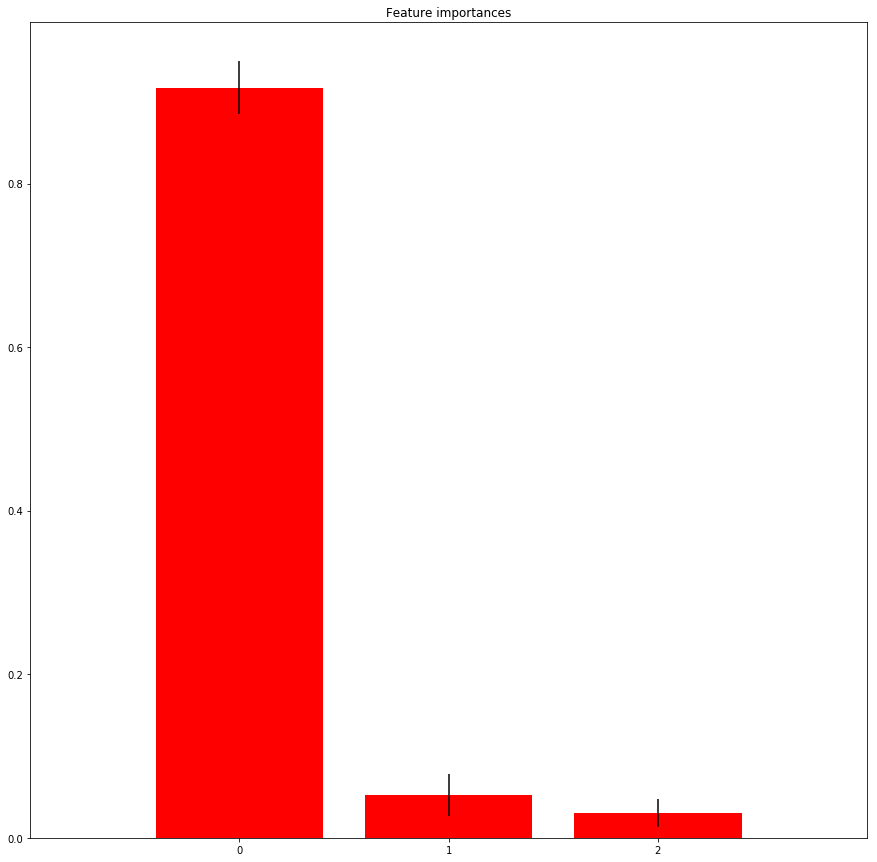

In [57]:
import matplotlib.pyplot as plt
forest = pmt

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,15))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [43]:
RandomForestRegressor.plot_importance(pmt)

AttributeError: type object 'RandomForestRegressor' has no attribute 'plot_importance'